<a href="https://colab.research.google.com/github/e-abtahi/Computer_Vision_Portfolio/blob/main/01_Computer_Vision_Basics/OpenCV_for_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with Images using OpenCV**




<b>OpenCV</b> stands for Open Source Computer Vision.<br>
In this notebook we will learn to use the OpenCV library.

You can find out more about the OpenCV library <a href = "https://opencv.org/"> **here**</a>.

## **OpenCV**
- **OpenCV** is a huge open-source **library** for **computer vision**, **machine learning**, and **image processing**.
-  It can process images and videos to identify objects, faces, or even human handwriting.
- It can also be integrated with other libraries such as **Numpy** (Python), which are capable of processing the OpenCV array structure.
- OpenCV is used to identify image patterns and various features of the image, by using vector space and performing mathematical operations on these features.


### Here we will cover the following topics:
- Reading an image.
- Displaying the shape of an image.
- Saving the image.
- Resizing the image.
- Conversion of the image to grayscale.
- Extracting the RGB values of a pixel.
- Adjusting Brightness and Contrast.
- Gaussian Blurring to reduce the noise of an image.
- Images as a multidimensional array.






### We would encourage you to first go through the functions and operations discussed below, and then try to implement and practise the same on other images.

### **OpenCV Functions covered in the Notebook**

#### **1. The imread(), imshow() and imwrite() functions**
- **imread():** Used to read the image. Refer to the image in the current working directory or provide the full path to the image.
- **imshow():** Used to display the image in a window. For Colab operations, use <i>"import from google.colab.patches"</i> and <i>"import cv2_imshow()"</i> to display the image. We will use the same in this practice notebook.
- **imwrite():** Used to save an image to the current working directory. You can use this to apply preprocessing to your images and then save the edits.

#### **2. The shape of the image**
- **.shape:** After reading the image, use .shape to find the shape of the image.
- Also, printing a read image outputs the numpy arrray implementation of the image and suggests that the image is saved as a numpy array in the object.

#### **3. Resizing the image**
- **resize():** Used to resize the image to a desired size.
<br> Syntax - "*cv2.resize(image, (110, 110))*"
-  Image resizing can help in reducing the number of pixels in an image and that has computational advantages - It can reduce the time of training of a neural network as the more the number of pixels in an image, the more the number of input nodes, which in turn increases the complexity of the model.
- Image resizing also helps in zooming in to images, which may help in better feature extraction.
- Many a time, we may need to resize the image i.e. either shrink it or scale it up to meet certain image size requirements, so it is an important step in the process.

#### **4. Converting an image**
- **cvtColor():** Used to convert the images using a certain conversion scheme.<br>
Syntax - "*cv2.cvtColor(image, code)*"<br>
- The arguments for this function are the image and the coversion code that needs to be applied on the image. To grayscale the images for example, we use the conversion code 'cv2.COLOR_BGR2GRAY' as the second argument.

#### **5. Gaussian Blurring**
- **cv2.GaussianBlur():** Used to apply a Gaussian Blur to the image.<br>
Syntax - <i>cv2.GaussianBlur(image, (5, 5), 2).</i><br>
The image is passed to the function along with the kernel size - Ex: "*cv2.GaussianBlur(image, (5, 5))*". Play around with the kernel size and spot the differences in the blurring.

#### **6. Extracting the ROI (Region of Interest)**
- A simple slicing operation similar to how Numpy arrays are sliced, can be used to extract the required Region of Interest. <br>
Syntax - <i> image[30:200,30:200]</i><br>
This can be used to extract specific required regions from the image, and may be an important hyperparameter if we have images with high variability in terms of the locations of important pixels.






- Computers 'look' at images as multidimensional arrays or matrices, but they can also be treated like functions (Ex: Taking the derivative over an image's x-axis).
- In the upcoming code blocks, an image of a Mandarin Duck is loaded from the file system and loaded into memory. This is the image on which we will be performing image processing operations from OpenCV. This image matrix is 220 x 220 x 3 which represents the number of rows x number of columns x number of color channels (RGB/BGR).
- We can then plot that data to view the image.
- **Note:** When images are loaded in OpenCV, they return BGR (blue, green, red) channels, where as Matplotlib expects RGB (red, green, blue).
<br> Therefore, we may need to convert loaded image matrices from BGR to RGB or vice-versa when switching between the two libraries.

### **Why is cv2_imshow() used in Google Colab over the cv2.imshow() used on local Jupyter notebooks?**
> **cv2.imshow()** requires a server in order to display an image, which is not available in Colab as it is used on the browser. Hence this function is not compatible with Google Colab and not used in this notebook.
<br><br> Hence we will be using the **cv2_imshow()** function which is in the "*google.colab.patches*" module, to display images in Colab.
<br><br>**cv2_imshow()** can be used in Google Colab by importing the function as shown below:
<br>
`from google.colab.patches import cv2_imshow`<br>
`cv2_imshow()`

## **Using OpenCV in Google Colab**
Google Colab already comes with the OpenCV module pre-installed, and it gets updated to the latest version from time to time by Google.

So we do not need to install it again on Colab.

## **Installing OpenCV on a Local Machine**

You can uncomment and use the below lines of code to install OpenCV on your local machine.

In [1]:
# !pip install opencv-python
# !pip install opencv-contrib-python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Checking the OpenCV version installed**

In [3]:
# Import OpenCV using the below code
import cv2
cv2.__version__

'4.8.0'

## **Reading and Displaying Images using OpenCV - Differences between OpenCV & Matplotlib**
- We can read an image stored in the same device folder, via the **imread()** function of OpenCV.
- The image read in can be displayed using the **imshow()** function of Matplotlib.
- Alternatively we can use the **imshow()** function of OpenCV as well.
<br> This function requires a window_name parameter along with the image.

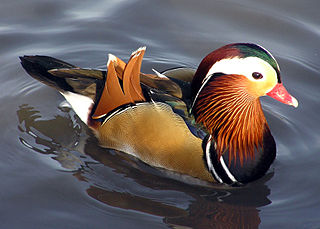

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

# Reading the image
img = cv2.imread('/content/drive/MyDrive/opencv.jpg')
# Displaying the image using OpenCV
cv2_imshow(img)

As we see above, OpenCV is able to successfully display the image read in.

- However, **one important point to note about OpenCV** is **it uses the BGR color scheme**, and not RGB.
- So **every image read in using OpenCV's cv2.imread() function saves the image as a BGR array**, and not as an RGB array.

This is fine if we're only working with OpenCV functions throughout, but **if we switch to another library that expects RGB arrays instead of BGR**, such as Matplotlib, it will wrongly read the Red values as if they were Blue, and the Blue values as Red, as it is expecting the image in the RGB format.

This problem manifests in the next code block.

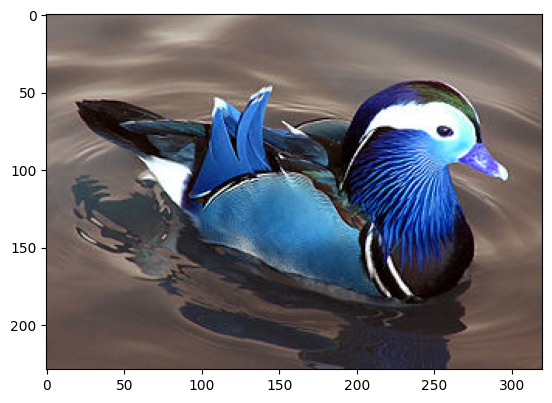

In [5]:
# Displaying the OpenCV image using Matplotlib
plt.imshow(img)
# Since Matplotlib expects an RGB image but we gave it a BGR image from OpenCV, the red colors of the duck have turned blue

- It can clearly be observed from the above image, that Matplotlib's **plt.imshow()** function has assumed the red channel of the OpenCV image to be the blue channel, as Matplotlib expects RGB images instead of the the BGR scheme that OpenCV images work with.
- Hence the duck is now wrongly colored blue instead of red.

The difference of color format is as follows:
*   **OpenCV uses the BGR format** to store and display images.
*   **Matplotlib uses the RGB format** to display images.

This difference in color schemes between OpenCV and Matplotlib needs to be kept in mind whenever transitioning from one library to another.


## **Resizing Images**

### **1. Resizing to a Specific Height and Width**

Original shape : (229, 320, 3)
New shape      : (400, 400, 3)


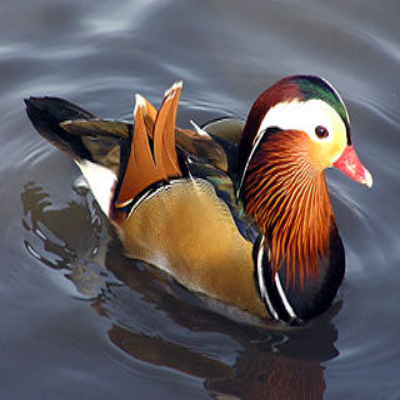

In [6]:
height = 400
width = 400
dimensions = (width, height)
new_image = cv2.resize(img, dimensions)
print("Original shape :", img.shape )
print("New shape      :", new_image.shape)
cv2_imshow(new_image);

- As we see above, the scale of the X and Y axes have changed to **400 by 400**.
- The size of the image has changed from (220, 220,3) to **(400, 400,3)**.
- The dimensions show that the image is of resolution 400 x 400 (height x width) and the 3 stands for the number of channels (number of components used to represent each pixel - B, G and R).

### **2. Resizing to a Specific Height and Width & Preserving the Aspect Ratio of the Image**

Original shape : (229, 320, 3)
New shape      : (400, 400, 3)


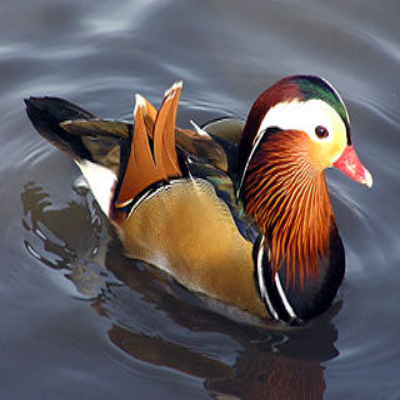

In [7]:
height = 400
width = 400
dimensions = (width, height)
new_image = cv2.resize(img, dimensions, interpolation=cv2.INTER_LINEAR)
print("Original shape :", img.shape )
print("New shape      :", new_image.shape)
cv2_imshow(new_image);

- Resizing images while maintaining their aspect ratio, is achieved through the use of the interpolation parameter in the **resize()** function.
- **Interpolation** is a technique that is used to create new pixels based on already present pixel values, and is hence required for resizing images while maintaining aspect ratios.
- Interpolation takes neighbourhood pixel values to create new pixels and increase/decrease the image size while keeping the aspect ratio constant.

### **3. Resizing with a Scaling Factor**


Original shape : (229, 320, 3)
New shape      : (91, 128, 3)


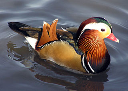

In [8]:
height = img.shape[0]
width = img.shape[1]

# We want the new image to be 40% of the original image
scale_factor = 0.4
new_height = int(height * scale_factor)  # 229 * 0.4 = 91
new_width = int(width * scale_factor)    # 320 * 0.4 = 128
dimensions = (new_width, new_height)     # (91, 128)
new_image = cv2.resize(img, dimensions, interpolation=cv2.INTER_LINEAR)
print("Original shape :", img.shape )
print("New shape      :", new_image.shape)
cv2_imshow(new_image);

Since we want the new image to be 40% of the scale of the old one, our scale_factor will be 40% or **0.4.**

## **Color Conversion**

- **Color conversion is often an important image pre-processing step** before passing images to Deep Learning models, in order to simplify their learning tasks or improve their performance on those tasks.
- We can convert colors in an image using the **cvtColor()** function of OpenCV.
- This function takes in the image and the conversion code as its parameters.
- We can then display the image using **cv2_imshow()** on Google Colab.
- We can convert images to various color schemes, such as Grayscale, HSV, HSL etc., using the same **cvtColor()** function, as long as we pass the relevant conversion code.

### **1. Grayscale Conversion**

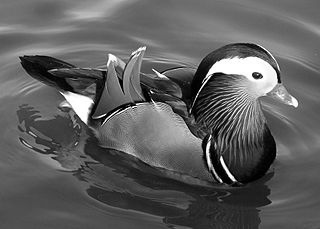

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

-   Here, the **cv2.COLOR_BGR2GRAY** conversion code is used in the **cvtColor()** function to convert our image to grayscale.
-   **Grayscale conversion**, as we know, helps in reducing the complexity of the image (one channel instead of three) and the computational power required to learn from the image, and is hence usually a good idea for Deep Learning models.

### **2. HSV Conversion**

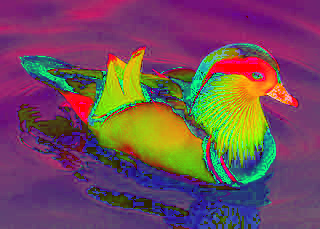

In [10]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

- Here, the **cv2.COLOR_BGR2HSV** conversion code is used in the **cvtColor()** function to convert our image to the HSV color scheme.
- The HSV color scheme finds great use in performance-critical Computer Vision tasks, such as object detection for images with poor lighting, because the various objects in an image may not be clearly distinguishable in normal RGB colors, and the HSV color scheme enhances the ability to detect separate entities and patterns in such images.

## **Adjusting the Brightness and Contrast of Images**

- Increasing the contrast of an image increases the difference between the light and dark areas of the picture. Decreasing the contrast, on the other hand, makes the picture look a little washed out. Finding the right contrast of an image can sometimes be a useful hyperparameter to tune in maximimzing the performance of our Deep Learning models.

- The brightness of an image is changed by manipulating its pixel values. The greater the pixel value, the closer it is towards white and the brighter it will be. Conversely, making pixel values smaller will make them darker. Adjusting the brightness of a pixel is as simple as adding a variable value to each pixel's intensity value.

- Contrast and Brightness are often used in object detection and image segmentation tasks in Computer Vision, to make the edges of objects more clear by exaggerating neighbor pixel intensity differences.

- To change the Contrast and Brightness of images, we use a function called **convertScaleAbs()**.

In [11]:
def brightness_contrast(img, alpha = 0, beta = 0):
    # alpha Contrast control (1.0-3.0)
    # beta Brightness control (0-100)

    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted


-   **The alpha value** - It is used for Contrast control (1.0 - 3.0)
-   **The beta value** - It is used for Brightness control (0 - 100)



Original Image


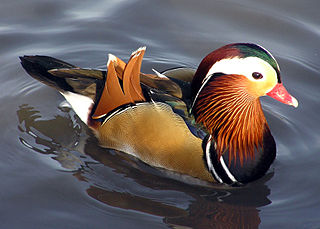



Image with Increased Brightness


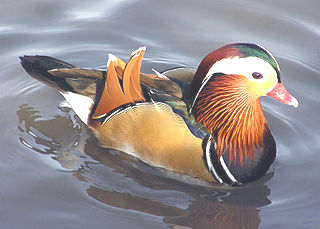

In [12]:
new_img = brightness_contrast(img, 1, 50)

print("Original Image")
cv2_imshow(img)

print("\n")

print("Image with Increased Brightness")
cv2_imshow(new_img)

Original Image


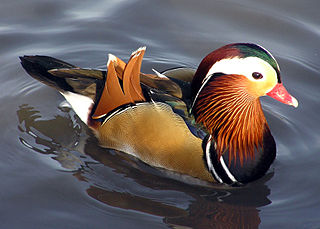



Image with Increased Contrast


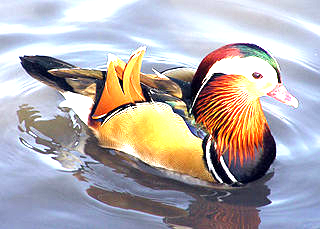

In [13]:
new_img = brightness_contrast(img, 2, 0)
print("Original Image")
cv2_imshow(img)

print("\n")

print("Image with Increased Contrast")
cv2_imshow(new_img)

## **Gaussian Blurring**

**Gaussian Blurring** is a filtering technique for images, where a kernel with values in a Gaussian distribution are used. The values are generated by a Gaussian function, so that requires a sigma value for its parameter.

- Gaussian Blurring helps in Noise Removal and in smoothening the image.
- Through Gaussian Blurring, low-intensity edges are removed.
- This helps in hiding certain details about the image where necessary.

Original Image


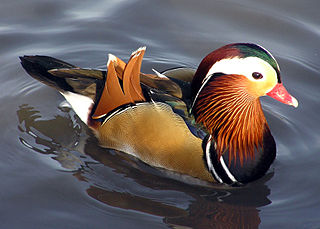



Output after the First Gaussian Blurring


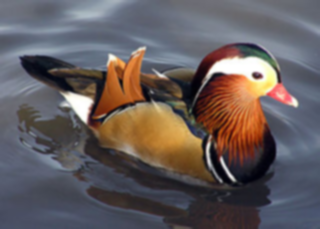



Output after the Second Gaussian Blurring 



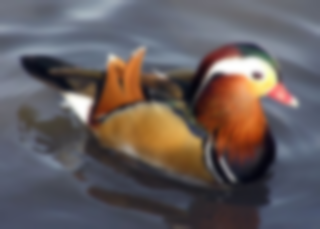

In [14]:
Gaussian1 = cv2.GaussianBlur(img, ksize =(5, 5),sigmaX =  0)
Gaussian2 = cv2.GaussianBlur(img,ksize= (15, 15), sigmaX= 0)
print('Original Image')
cv2_imshow(img)

print("\n")

print('Output after the First Gaussian Blurring')
cv2_imshow(Gaussian1)

print("\n")

print('Output after the Second Gaussian Blurring \n')
cv2_imshow(Gaussian2)

## **Images as Multidimensional Arrays**

In [15]:
print('Image Matrix: \n', img)
print(type(img))

Image Matrix: 
 [[[127 115 111]
  [127 115 111]
  [126 114 110]
  ...
  [110  99  95]
  [110  99  95]
  [110  99  95]]

 [[127 115 111]
  [127 115 111]
  [126 114 110]
  ...
  [110  99  95]
  [110  99  95]
  [110  99  95]]

 [[128 116 112]
  [127 115 111]
  [127 115 111]
  ...
  [110  99  95]
  [110  99  95]
  [110  99  95]]

 ...

 [[100  78  72]
  [101  79  73]
  [102  80  74]
  ...
  [113  94  81]
  [111  92  79]
  [109  90  77]]

 [[101  79  73]
  [101  79  73]
  [102  80  74]
  ...
  [110  91  78]
  [106  87  74]
  [104  85  72]]

 [[104  80  74]
  [104  80  74]
  [104  80  74]
  ...
  [ 98  81  68]
  [ 93  76  63]
  [ 91  74  61]]]
<class 'numpy.ndarray'>


In [16]:
print("The shape of the original Image is ",img.shape)
print("Size of Original image",img.size)
print("The shape of the Grayscale Image is ",img_gray.shape)
print("Size of Grayscale image",img_gray.size)

The shape of the original Image is  (229, 320, 3)
Size of Original image 219840
The shape of the Grayscale Image is  (229, 320)
Size of Grayscale image 73280


- From the above, we clearly observe the shape of the original RGB image as a three dimensional array, whereas the grayscale image can be seen as a two dimensional image.

- We also observe the dimensions of the image being decreased from a 3D Array (229, 320, 3) to a 2D Array (229, 320) while converting an RGB image into a grayscale image.



## **Region of Interest**

- Extracting the Region of Interest (ROI) of an image is as simple as slicing an array in Python.
- In this case, we slice the Numpy arrays that represent the images to extract the Region of Interest.
- We use this technique to focus on specific regions from our image (i.e. Region of Interest). This may be required in certain use cases where only some part of the image contains the information we really require for a Computer Vision task, and the other background parts of an image can be removed as they don't contribute any value to the predictive power our model needs.

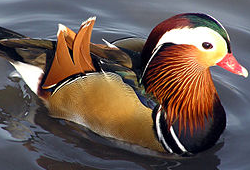

In [17]:
roi=img[30:200,50:300]
cv2_imshow(roi)

As we see above, array slicing has allowed us to focus on the Region of Interest, which is the part of the image which contains the pixels that we are really interested in. (the duck)